In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from collections import Counter
from scipy.stats import ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
train_dataset.shape

(103904, 25)

In [4]:
test_dataset.shape

(25976, 25)

In [5]:
print("Keys of train dataset:\n", train_dataset.keys())
train_dataset['satisfaction'].unique()

Keys of train dataset:
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [6]:
print("Keys of test dataset:\n", test_dataset.keys())
test_dataset['satisfaction'].unique()

Keys of test dataset:
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [7]:
train_dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
train_dataset.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
test_dataset.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [10]:
#assuming that no value in arrival delay means zero minutes delayed
train_dataset['Arrival Delay in Minutes'] = train_dataset['Arrival Delay in Minutes'].fillna(0)
test_dataset['Arrival Delay in Minutes'] = test_dataset['Arrival Delay in Minutes'].fillna(0)

Text(0, 0.5, 'Count')

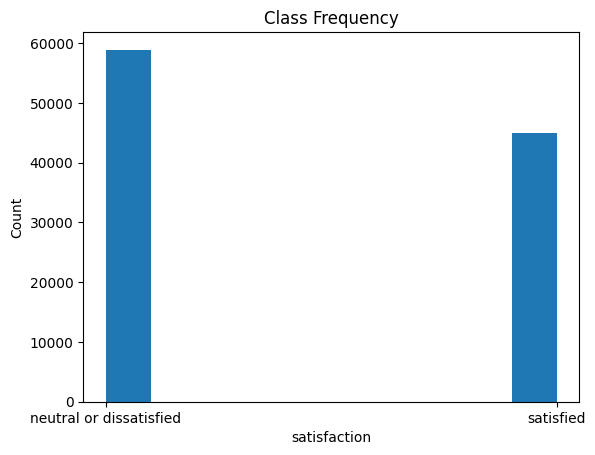

In [11]:
outcome_counts = train_dataset['satisfaction']
fig,ax = plt.subplots()
ax.hist(outcome_counts)
ax.set_title('Class Frequency')
ax.set_xlabel('satisfaction')
ax.set_ylabel('Count')

In [12]:
numerical_data = train_dataset.select_dtypes(include='number')
categorical_data = train_dataset.select_dtypes(include= 'object')

numerical_features = numerical_data.columns.tolist()
categorical_features = categorical_data.columns.tolist()

print(f'Number of numerical features: {len(numerical_features)}')
print(numerical_features)
print(f'Number of categorical features: {len(categorical_features)}')
print(categorical_features)

Number of numerical features: 20
['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Number of categorical features: 5
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [13]:
#categorical unique classes
unique_counts=categorical_data.nunique()
print(unique_counts)

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64


In [14]:
#numerical
unique_counts=numerical_data.nunique()
print(unique_counts)

Unnamed: 0                           103904
id                                   103904
Age                                      75
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes                455
dtype: int64


In [15]:
train_dataset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [16]:
train_dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
train_dataset['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [18]:
train_dataset['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [19]:
train_dataset['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [20]:
train_dataset['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [21]:
train_dataset['Gender'] = train_dataset['Gender'].map({'Male': 0, 'Female': 1})
train_dataset['Customer Type'] = train_dataset['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
train_dataset['Type of Travel'] = train_dataset['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
train_dataset['Class'] = train_dataset['Class'].map({'Eco Plus': 0, 'Business': 1, 'Eco': 2})
train_dataset['satisfaction'] = train_dataset['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [22]:
test_dataset['Gender'] = test_dataset['Gender'].map({'Male': 0, 'Female': 1})
test_dataset['Customer Type'] = test_dataset['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
test_dataset['Type of Travel'] = test_dataset['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
test_dataset['Class'] = test_dataset['Class'].map({'Eco Plus': 0, 'Business': 1, 'Eco': 2})
test_dataset['satisfaction'] = test_dataset['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [23]:
train_dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,0,1,13,0,0,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,0,0,25,1,1,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,1,1,26,1,1,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,1,1,25,1,1,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,0,1,61,1,1,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


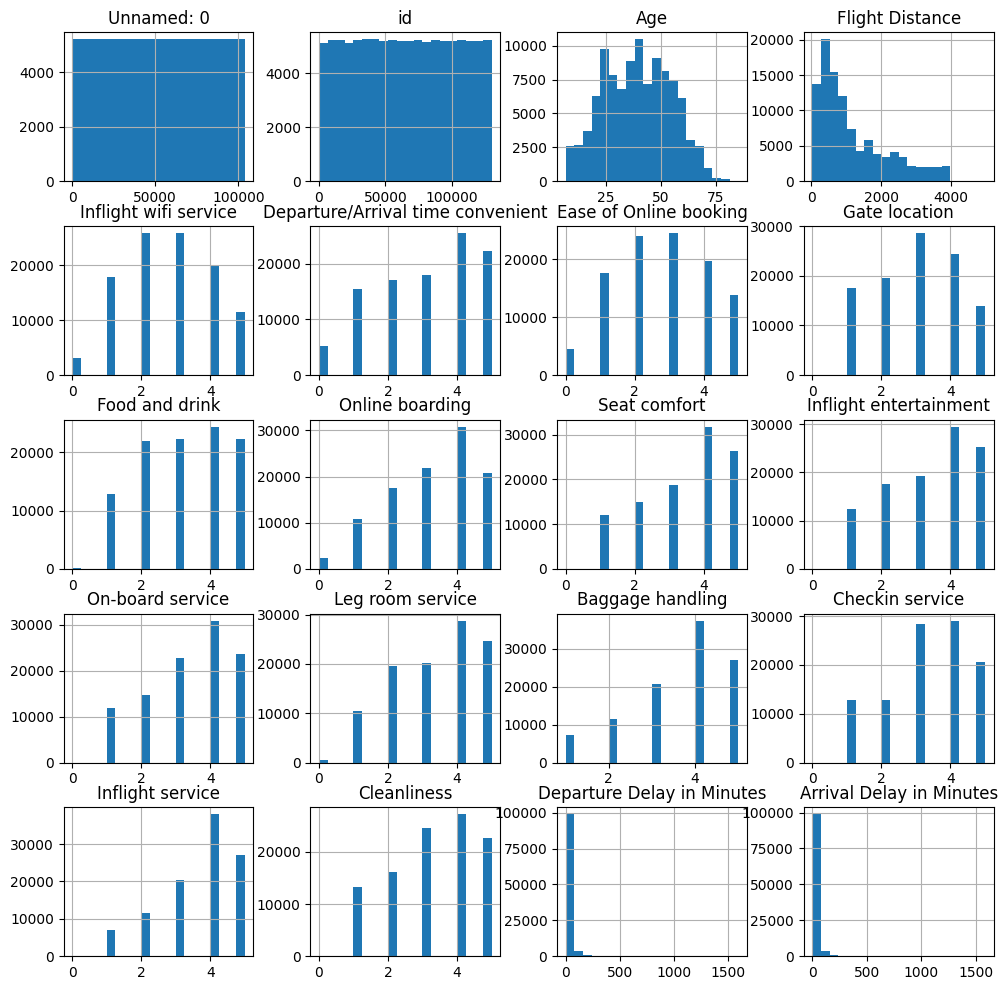

In [24]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

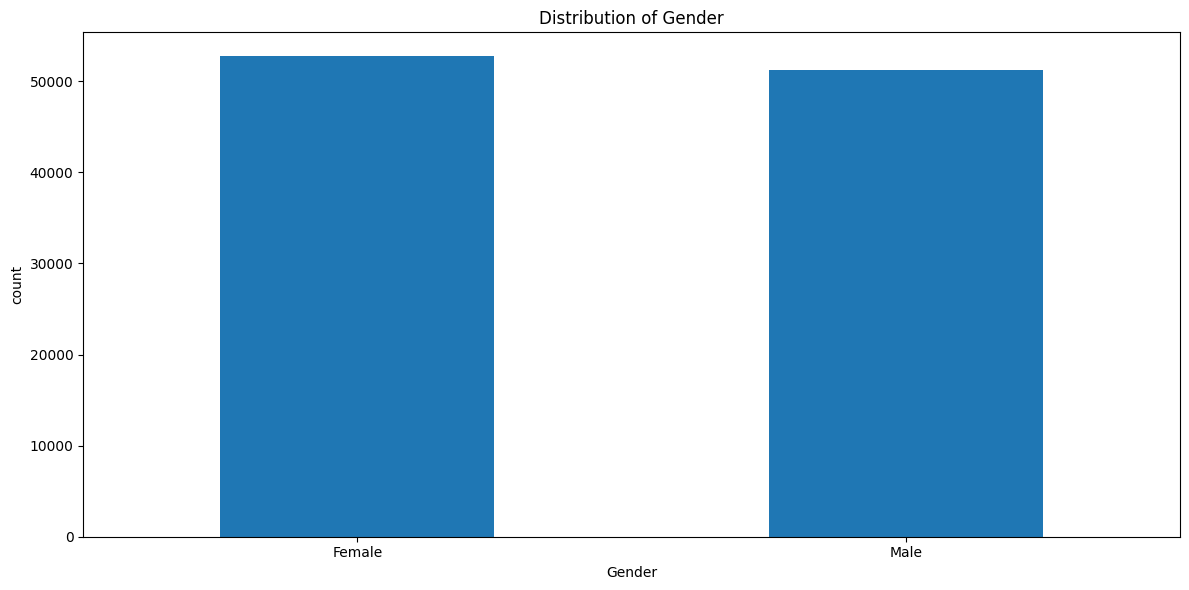

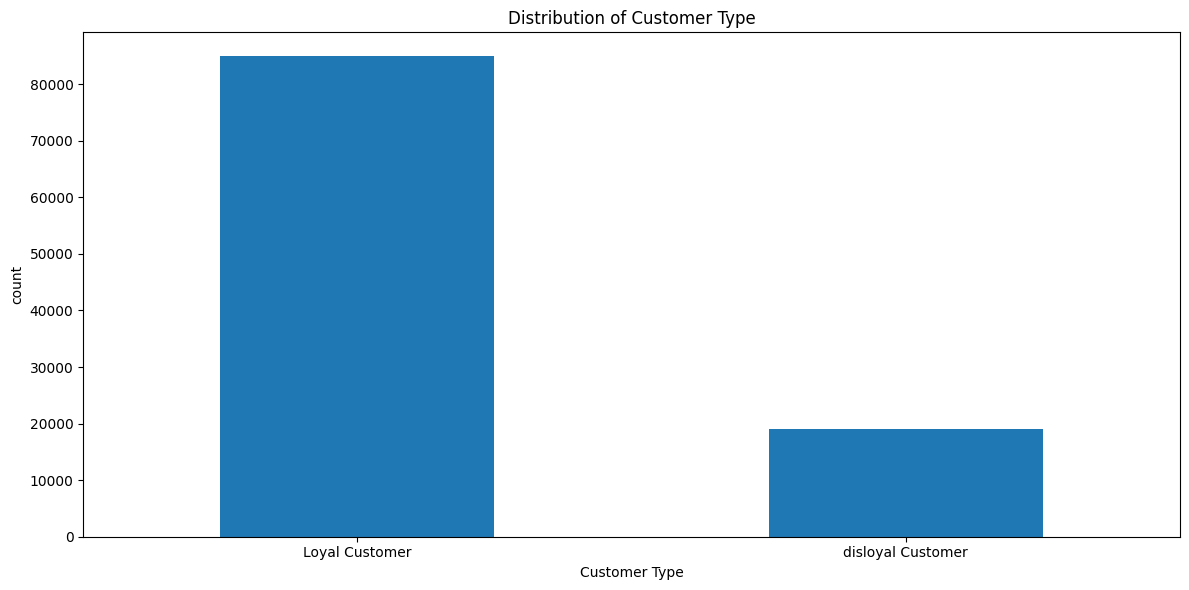

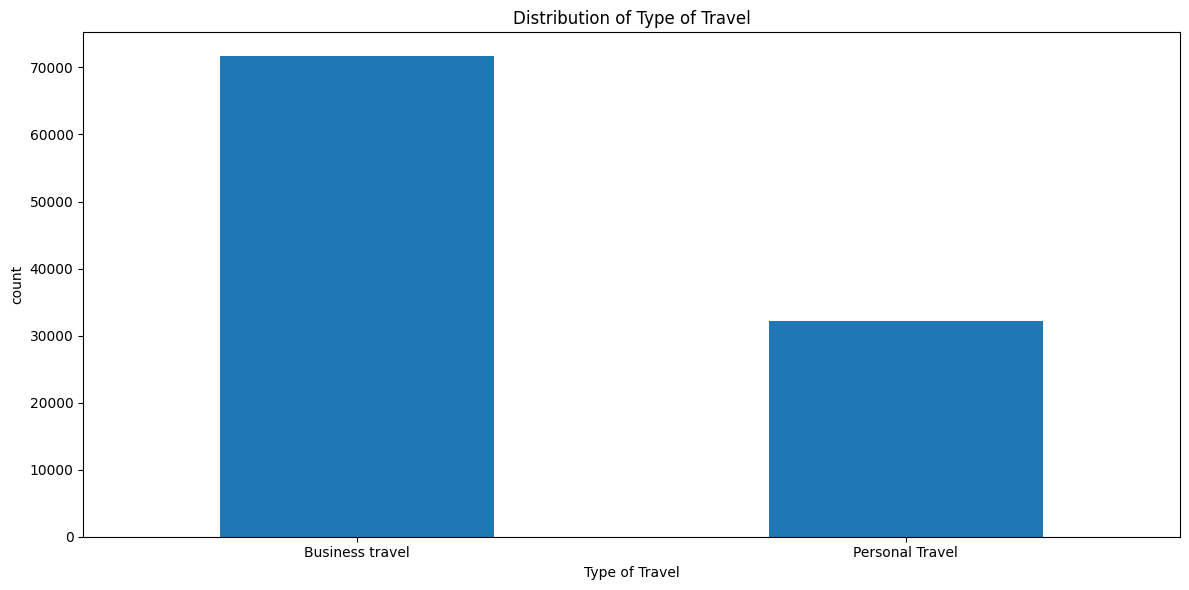

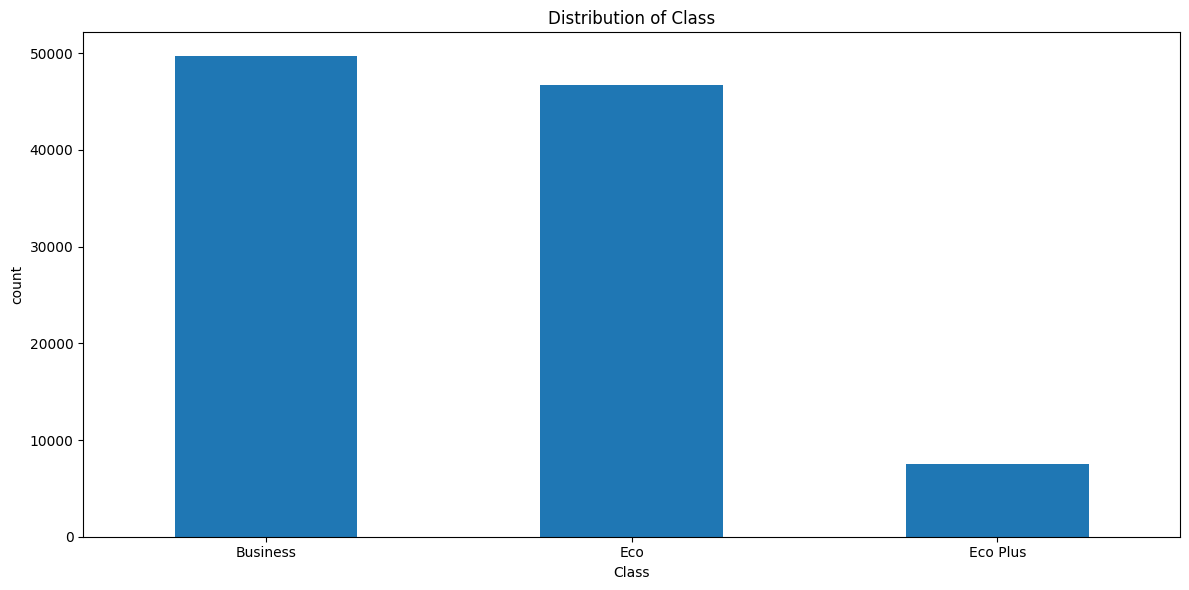

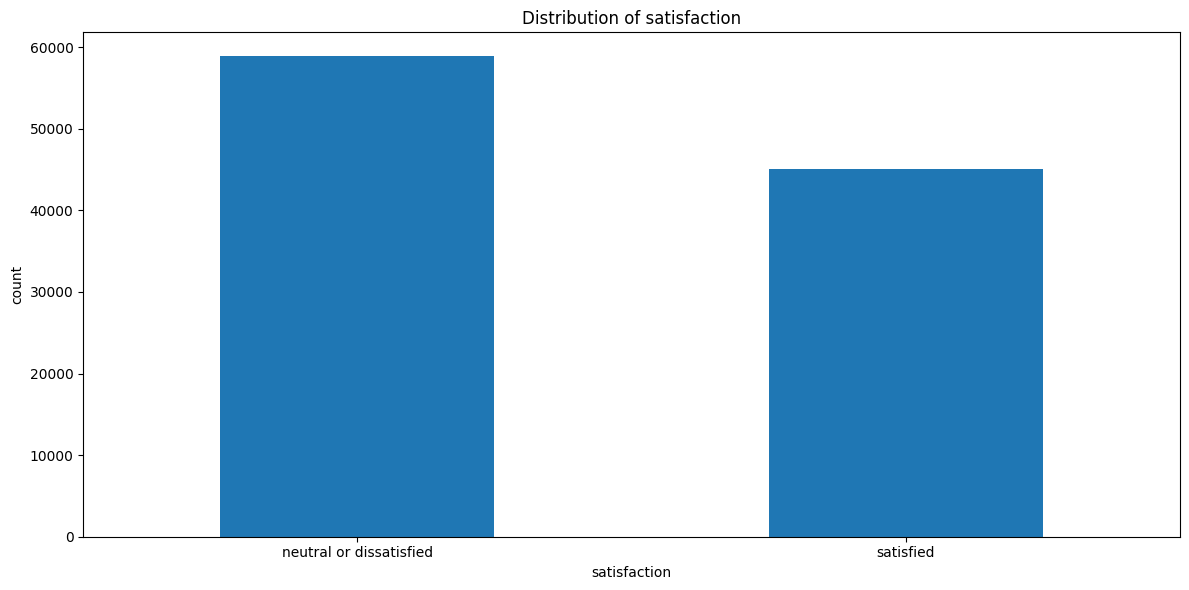

In [25]:
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.tight_layout()
    plt.show()

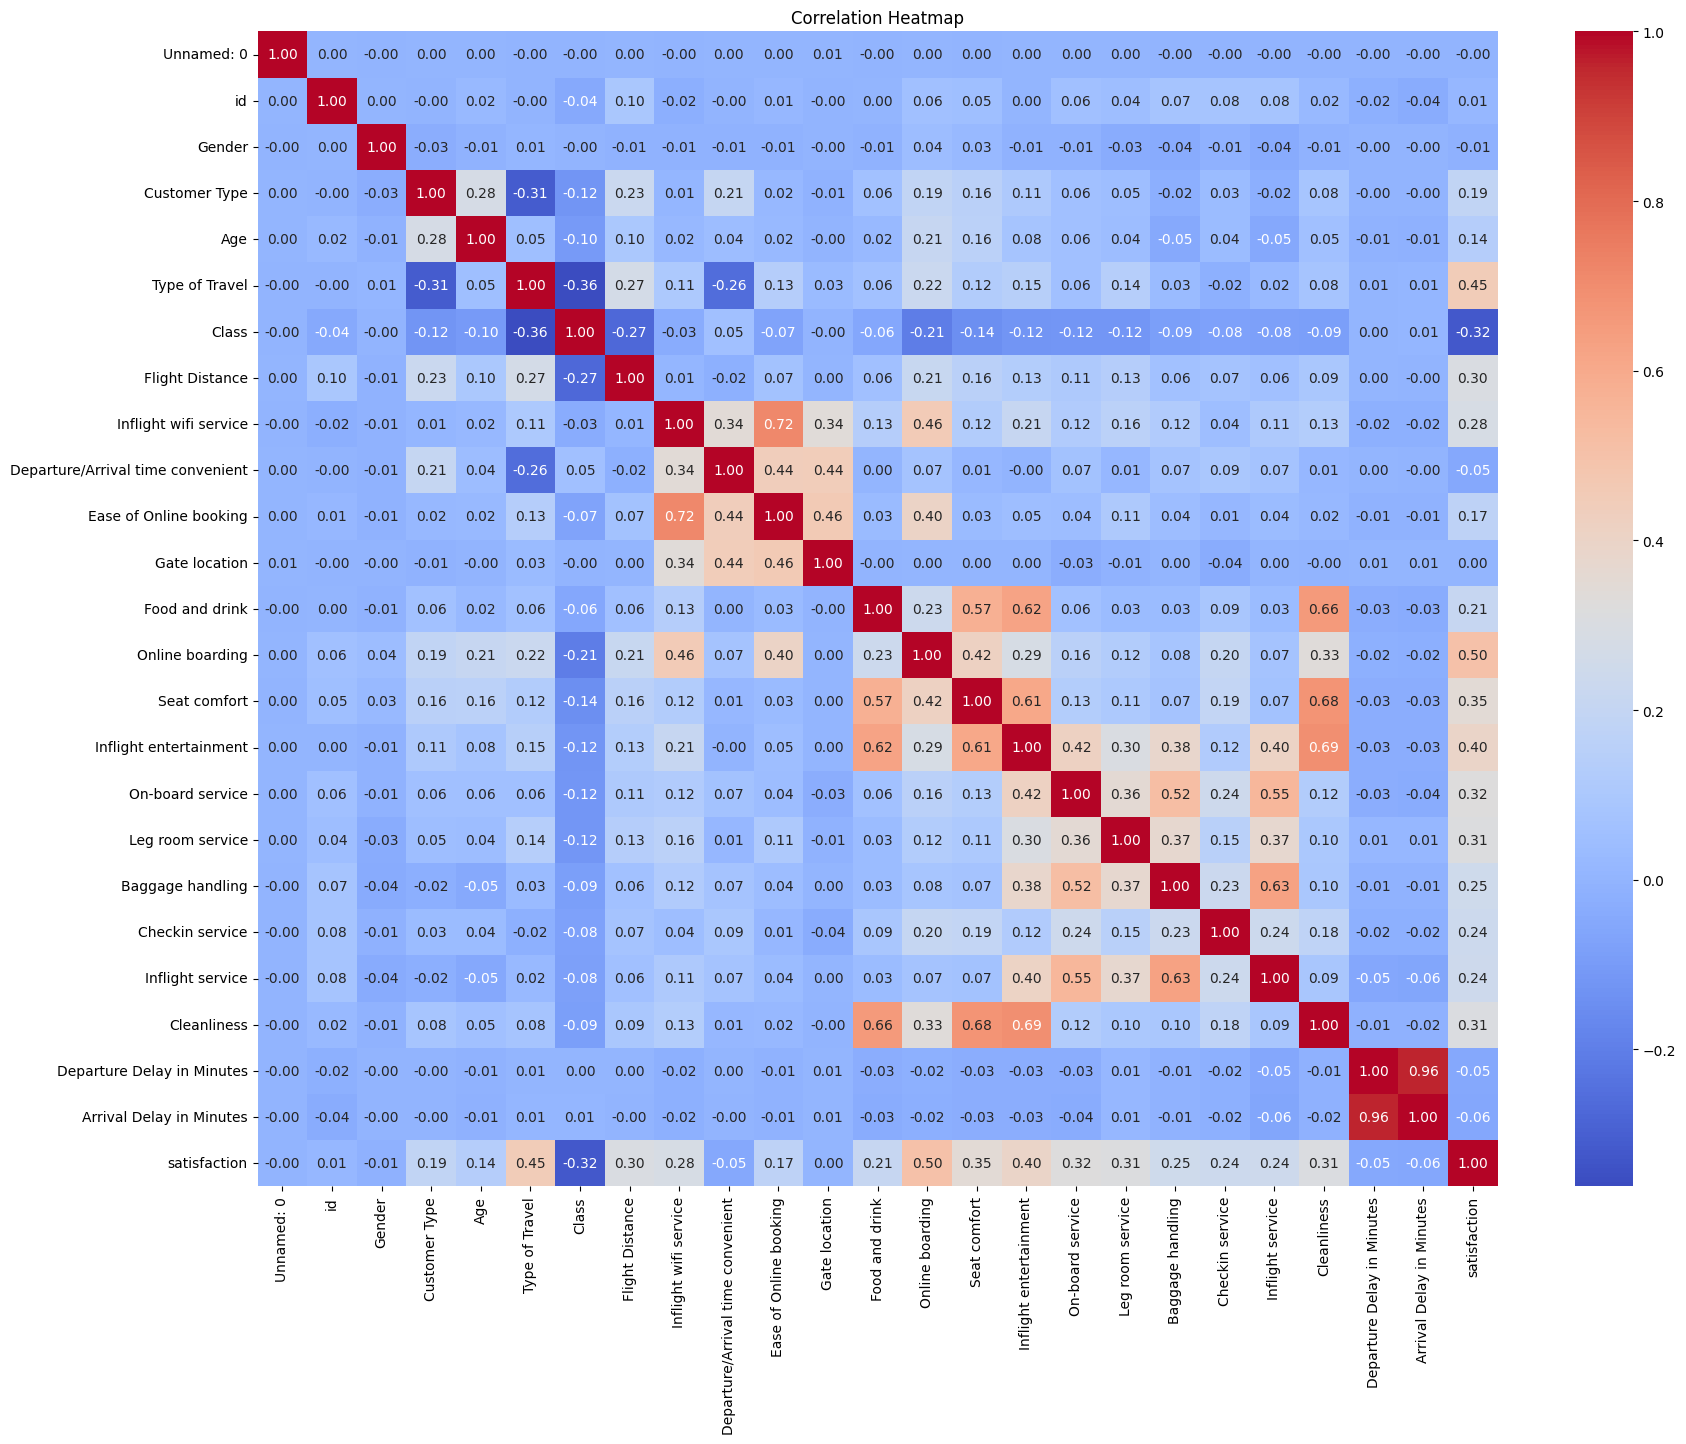

In [26]:
corr_matrix = train_dataset.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Principal component analysis

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_dataset)
X_test_scaled = scaler.transform(test_dataset)

In [28]:
pca = PCA(n_components=0.95)
X_scaled = X_train_scaled
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"PCA shape: {X_pca.shape}")

Original shape: (103904, 25)
PCA shape: (103904, 20)


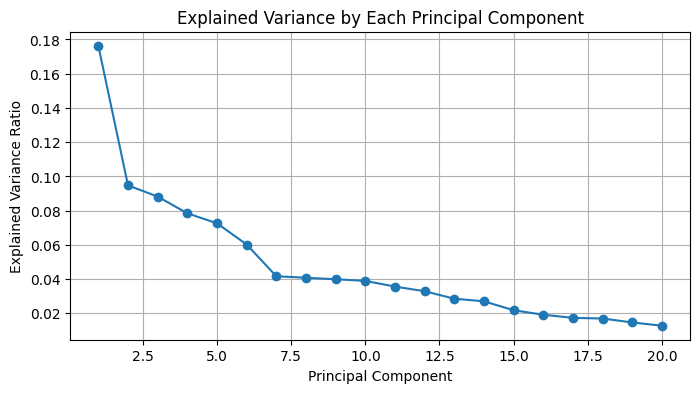

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [30]:
loadings = pca.components_  # shape: (n_components, n_features)
feature_names = train_dataset.columns
loading_df = pd.DataFrame(
    loadings.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

# Top contributing features for each PC
for i in range(pca.n_components_):
    print(f"\nTop features for PC{i+1}:")
    print(loading_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(5))


Top features for PC1:
Inflight entertainment    0.375303
satisfaction              0.332452
Seat comfort              0.315543
Cleanliness               0.308173
Online boarding           0.294470
Name: PC1, dtype: float64

Top features for PC2:
Ease of Online booking               0.533630
Inflight wifi service                0.450016
Departure/Arrival time convenient    0.432719
Gate location                        0.431399
Inflight entertainment               0.164196
Name: PC2, dtype: float64

Top features for PC3:
Inflight service    0.448217
Baggage handling    0.436496
On-board service    0.372225
Food and drink      0.325827
Seat comfort        0.310841
Name: PC3, dtype: float64

Top features for PC4:
Departure Delay in Minutes    0.697193
Arrival Delay in Minutes      0.697034
Type of Travel                0.084682
Leg room service              0.075432
Class                         0.061405
Name: PC4, dtype: float64

Top features for PC5:
Type of Travel                      

In [31]:
top_features = []
#top 5 features for each principal component
for i in range(pca.n_components_):
    top = loading_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(5)
    top_features.extend(top.index.tolist())

feature_frequency = Counter(top_features)

pca_feature_counts = pd.DataFrame.from_dict(feature_frequency, orient='index', columns=['Frequency'])
pca_feature_counts = pca_feature_counts.sort_values(by='Frequency', ascending=False)
print(pca_feature_counts)

                                   Frequency
Gate location                             10
Flight Distance                            9
Departure/Arrival time convenient          7
Class                                      6
Checkin service                            6
Online boarding                            5
Seat comfort                               4
Inflight entertainment                     4
satisfaction                               4
Customer Type                              4
On-board service                           4
Leg room service                           4
Inflight service                           4
Gender                                     4
Baggage handling                           3
Inflight wifi service                      3
Age                                        3
id                                         3
Food and drink                             3
Type of Travel                             3
Cleanliness                                2
Unnamed: 0

# **T** **test**

In [32]:
satisfied = train_dataset[train_dataset['satisfaction'] == 1]['Gate location']
dissatisfied = train_dataset[train_dataset['satisfaction'] == 0]['Gate location']

t_stat, p_val = ttest_ind(satisfied, dissatisfied, equal_var=False)
print("T-test for Gate Location vs Satisfaction")
print(f"p-value = {p_val:.4f}")

T-test for Gate Location vs Satisfaction
p-value = 0.8291


In [33]:
satisfied = train_dataset[train_dataset['satisfaction'] == 1]['Departure/Arrival time convenient']
dissatisfied = train_dataset[train_dataset['satisfaction'] == 0]['Departure/Arrival time convenient']

t_stat, p_val = ttest_ind(satisfied, dissatisfied, equal_var=False)

print("T-test for Departure/Arrival Time Convenient vs Satisfaction")
print(f"p-value = {p_val:.4f}")

T-test for Departure/Arrival Time Convenient vs Satisfaction
p-value = 0.0000


In [34]:
# Departure Delay
satisfied_dep = train_dataset[train_dataset['satisfaction'] == 1]['Departure Delay in Minutes']
dissatisfied_dep = train_dataset[train_dataset['satisfaction'] == 0]['Departure Delay in Minutes']

t_stat_dep, p_val_dep = ttest_ind(satisfied_dep, dissatisfied_dep, equal_var=False)
print("T-test for Departure Delay in Minutes vs Satisfaction")
print(f"p-value = {p_val_dep:.4f}")

# Arrival Delay
satisfied_arr = train_dataset[train_dataset['satisfaction'] == 1]['Arrival Delay in Minutes']
dissatisfied_arr = train_dataset[train_dataset['satisfaction'] == 0]['Arrival Delay in Minutes']

t_stat_arr, p_val_arr = ttest_ind(satisfied_arr, dissatisfied_arr, equal_var=False)
print("\nT-test for Arrival Delay in Minutes vs Satisfaction")
print(f"p-value = {p_val_arr:.4f}")

T-test for Departure Delay in Minutes vs Satisfaction
p-value = 0.0000

T-test for Arrival Delay in Minutes vs Satisfaction
p-value = 0.0000


In [35]:
train_dataset = train_dataset.drop(['Unnamed: 0', 'id', 'Gender', 'Gate location'], axis=1)
test_dataset = test_dataset.drop(['Unnamed: 0', 'id', 'Gender', 'Gate location'], axis=1)

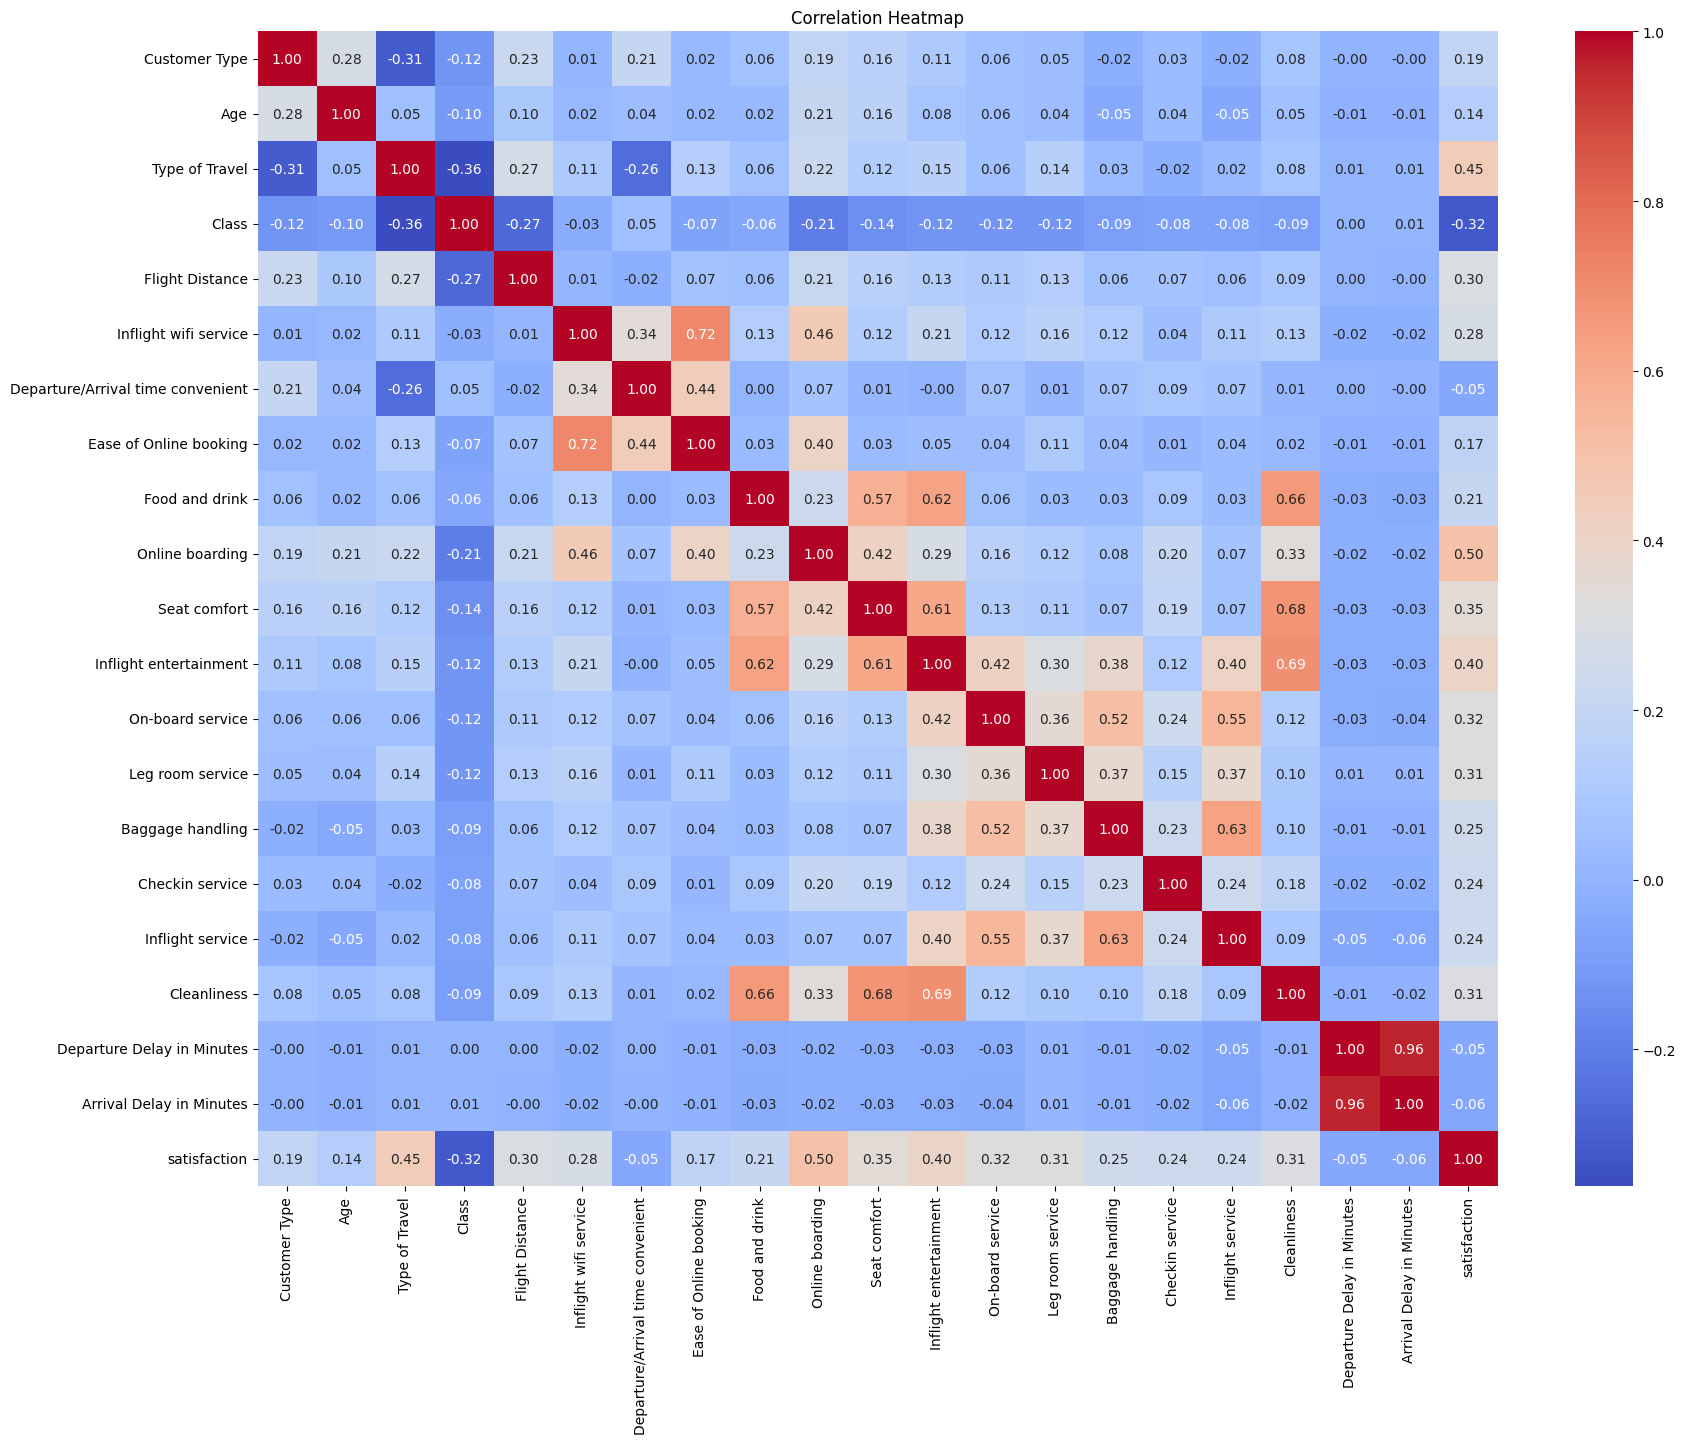

In [36]:
corr_matrix = train_dataset.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Train test set**

In [37]:
X_train = train_dataset.drop('satisfaction', axis=1)
Y_train = train_dataset['satisfaction']

X_test = test_dataset.drop('satisfaction', axis=1)
Y_test = test_dataset['satisfaction']

In [38]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(X_train_scaled, Y_train)
y_pred = knn.predict(X_test_scaled)

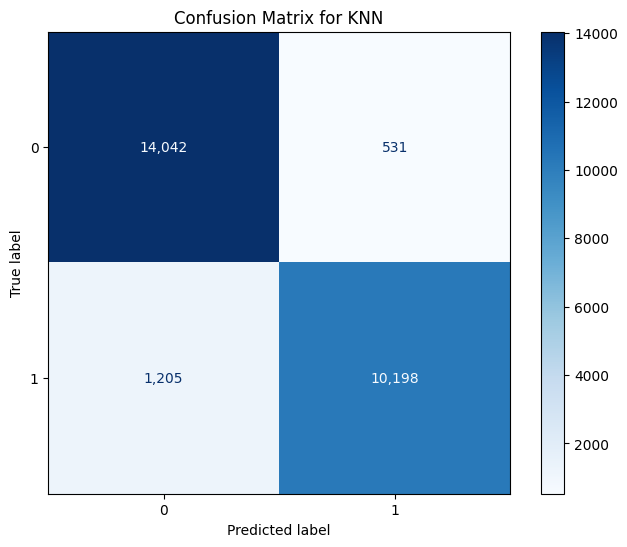

Classification Report of KNN:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy: 0.9332
Precision: 0.9339
Recall: 0.9332
F1 Score: 0.9329


In [41]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format=',')
plt.title("Confusion Matrix for KNN")
plt.show()

class_report = classification_report(Y_test, y_pred)
print("Classification Report of KNN:")
print(class_report)

y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

accuracy_knn = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_score(Y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(Y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(Y_test, y_pred, average='weighted'):.4f}")

# Random Forest


In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [43]:
rf.fit(X_train_scaled, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_pred_rf = rf.predict(X_test_scaled)

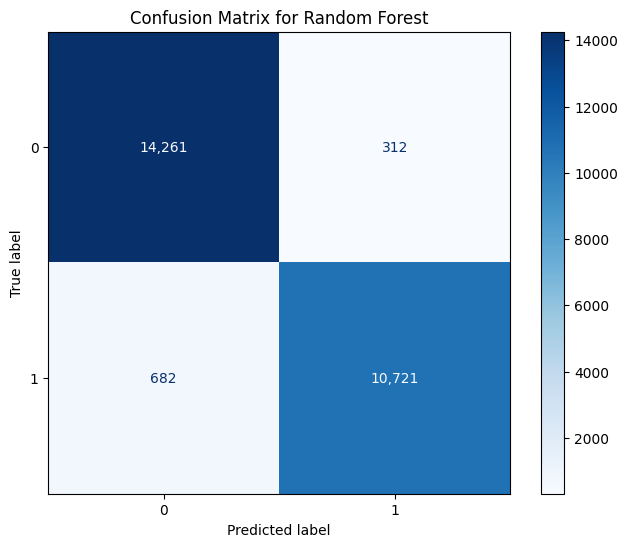

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy: 0.9617
Precision: 0.9620
Recall: 0.9617
F1 Score: 0.9617


In [45]:
cm = confusion_matrix(Y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format=',')
plt.title("Confusion Matrix for Random Forest")
plt.show()

class_report_rf = classification_report(Y_test, y_pred_rf)
print("Classification Report of Random Forest:")
print(class_report_rf)

y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_score(Y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(Y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(Y_test, y_pred_rf, average='weighted'):.4f}")

# Decision Tree

In [46]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [47]:
dt.fit(X_train_scaled, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [48]:
dt_preds = dt.predict(X_test_scaled)

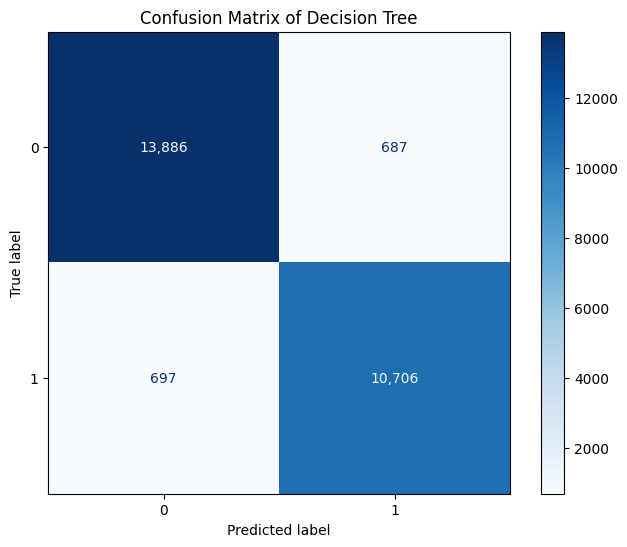

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Accuracy: 0.9467
Precision: 0.9467
Recall: 0.9467
F1 Score: 0.9467


In [49]:
cm = confusion_matrix(Y_test, dt_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format=',')
plt.title("Confusion Matrix of Decision Tree")
plt.show()

class_report = classification_report(Y_test, dt_preds)
print("Classification Report for Decision Tree:")
print(class_report)

y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]
accuracy_dt = accuracy_score(Y_test, dt_preds)
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_score(Y_test, dt_preds, average='weighted'):.4f}")
print(f"Recall: {recall_score(Y_test, dt_preds, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(Y_test, dt_preds, average='weighted'):.4f}")

# SVM

In [50]:
base_svm = LinearSVC(max_iter=10000, class_weight='balanced', random_state=42)
svm = CalibratedClassifierCV(base_svm)

In [51]:
svm.fit(X_train_scaled, Y_train)

,estimator,LinearSVC(cla...ndom_state=42)
,method,'sigmoid'
,cv,None
,n_jobs,None
,ensemble,'auto'
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'


In [52]:
y_pred_svm = svm.predict(X_test_scaled)

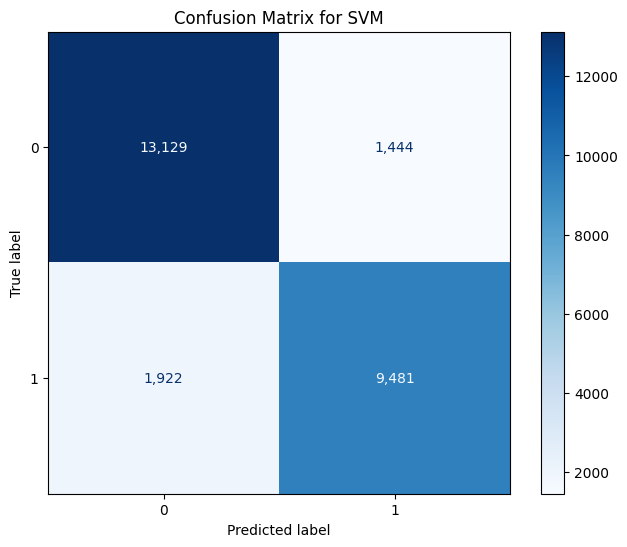

Classification Report of SVM:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Accuracy: 0.8704
Precision: 0.8703
Recall: 0.8704
F1 Score: 0.8701


In [53]:
cm = confusion_matrix(Y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format=',')
plt.title("Confusion Matrix for SVM")
plt.show()

class_report_svm = classification_report(Y_test, y_pred_svm)
print("Classification Report of SVM:")
print(class_report_svm)

y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_score(Y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall: {recall_score(Y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(Y_test, y_pred_svm, average='weighted'):.4f}")

# Performance Comparison

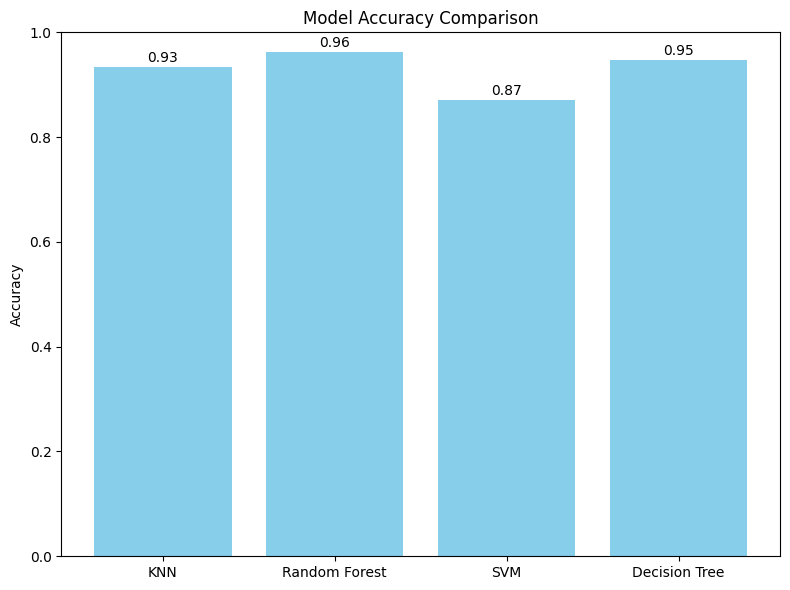

In [54]:
model_names = ['KNN','Random Forest','SVM', 'Decision Tree']
accuracies = [accuracy_knn,accuracy_rf,accuracy_svm,accuracy_dt]

plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center')

plt.tight_layout()
plt.show()

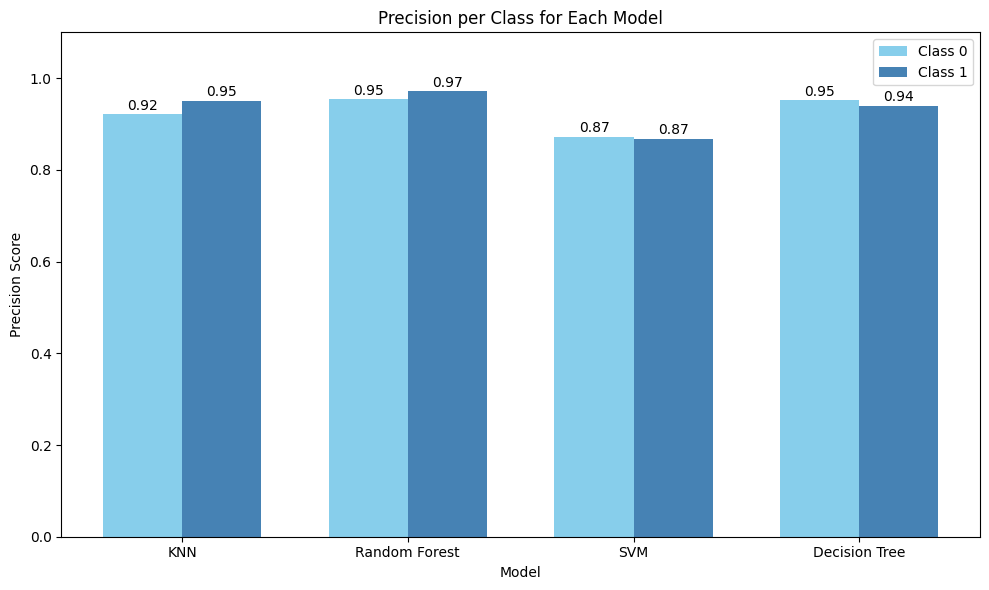

In [55]:
prec_knn = precision_score(Y_test, y_pred, average=None)
prec_rf = precision_score(Y_test, y_pred_rf, average=None)
prec_svm = precision_score(Y_test, y_pred_svm, average=None)
prec_dt = precision_score(Y_test, dt_preds, average=None)

precisions = np.array([prec_knn, prec_rf, prec_svm, prec_dt])
labels = ['KNN', 'Random Forest', 'SVM', 'Decision Tree']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width/2, precisions[:, 0], width, label='Class 0', color='skyblue')
bar2 = plt.bar(x + width/2, precisions[:, 1], width, label='Class 1', color='steelblue')
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center')

plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Precision per Class for Each Model')
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()

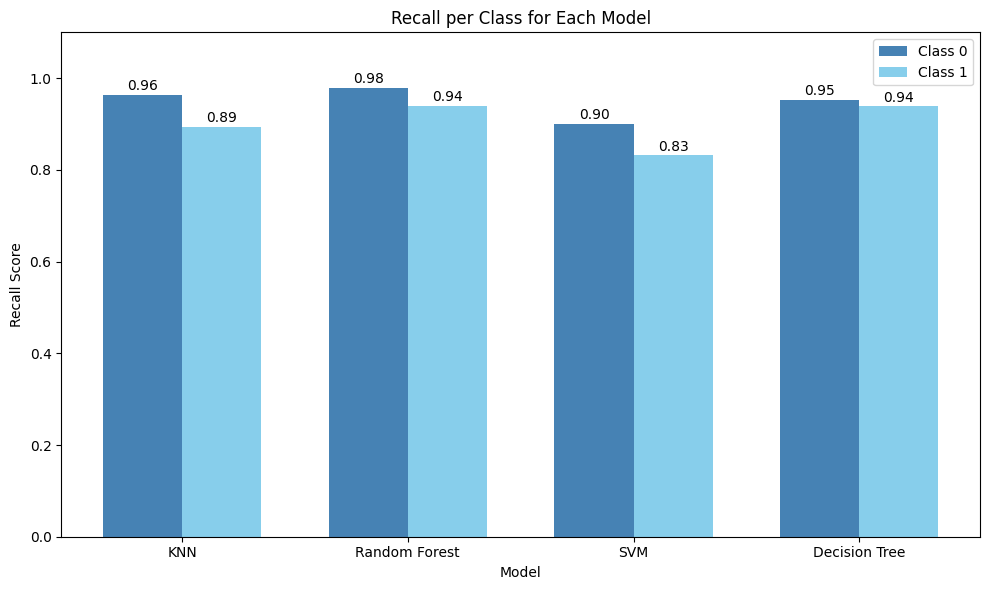

In [56]:
recall_knn = recall_score(Y_test, y_pred, average=None)
recall_rf = recall_score(Y_test, y_pred_rf, average=None)
recall_svm = recall_score(Y_test, y_pred_svm, average=None)
recall_dt = recall_score(Y_test, dt_preds, average=None)

recalls = np.array([recall_knn, recall_rf, recall_svm, recall_dt])
labels = ['KNN', 'Random Forest', 'SVM', 'Decision Tree']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width/2, recalls[:, 0], width, label='Class 0', color='steelblue')
bar2 = plt.bar(x + width/2, recalls[:, 1], width, label='Class 1', color='skyblue')

for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center')

plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Recall per Class for Each Model')
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()


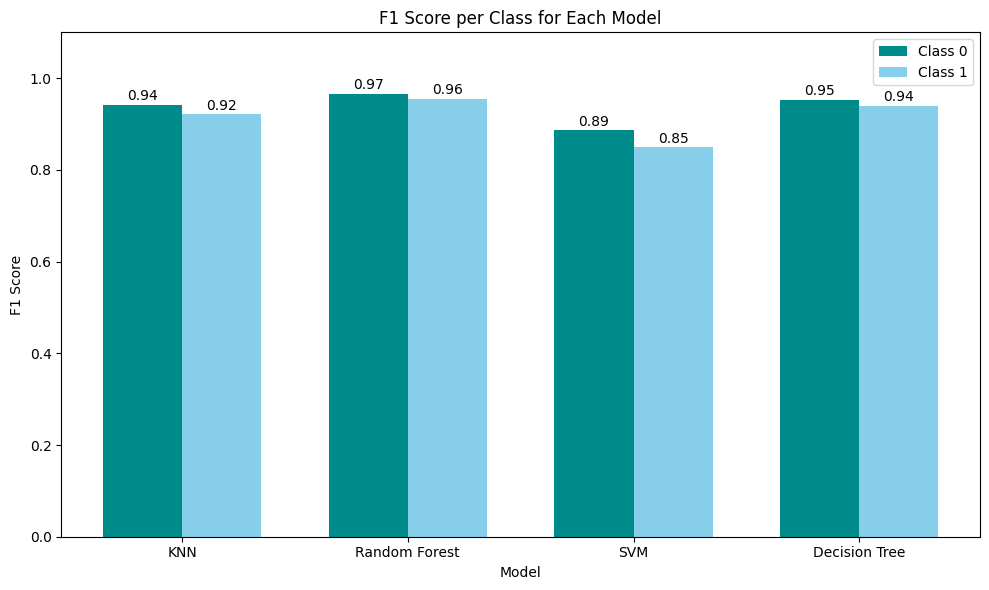

In [57]:
f1_knn = f1_score(Y_test, y_pred, average=None)
f1_rf = f1_score(Y_test, y_pred_rf, average=None)
f1_svm = f1_score(Y_test, y_pred_svm, average=None)
f1_dt = f1_score(Y_test, dt_preds, average=None)

f1s = np.array([f1_knn, f1_rf, f1_svm, f1_dt])
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width/2, f1s[:, 0], width, label='Class 0', color='darkcyan')
bar2 = plt.bar(x + width/2, f1s[:, 1], width, label='Class 1', color='skyblue')

for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center')

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score per Class for Each Model')
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
import joblib
joblib.dump(rf, "rf_model.pkl")
joblib.dump(dt, "dt_model.pkl")
joblib.dump(svm, "svm_model.pkl")
joblib.dump(knn, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']